In [374]:
import os
from os import path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tabulate
from scipy.stats import ttest_ind

CALCULATED_COLUMNS = ['n', 'protection', 'update', 'window', 'base', 'avg']
DDI_WEIGHTS = sorted(['[0.2, 0.8]',
                      '[0.3, 0.6]',
                      '[0.1, 0.9]',
                      '[0.2, 0.9]'])

In [375]:

DDI_SCORES_PATH = "D:\\JavaTraining\\mgr\\saved_scores\\ddi"
columns = [
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=50, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=50, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=100, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=100, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=200, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=200, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=50, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=50, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=100, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=100, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=200, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=200, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=50, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=50, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=100, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=100, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=50, update_period=200, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=50, update_period=200, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=50, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=50, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=100, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=100, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=200, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=200, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=50, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=50, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=100, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=100, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=200, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=200, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=50, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=50, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=100, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=100, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=100, update_period=200, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=100, update_period=200, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=50, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=50, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=100, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=100, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=200, window_size=10)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=200, window_size=10)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=50, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=50, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=100, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=100, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=200, window_size=20)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=200, window_size=20)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=50, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=50, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=100, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=100, window_size=40)",
    "ONSBoost(base_estimator=GaussianNB(), n_estimators={}, protection_period=200, update_period=200, window_size=40)",
    "ONSBoost(base_estimator=MLPClassifier(), n_estimators={}, protection_period=200, update_period=200, window_size=40)"
]

In [376]:
def load_scores(directory_path: str, n: int):
    saved_scores = [path.abspath(path.join(DDI_SCORES_PATH, file)) for file in os.listdir(directory_path) if
                    file.startswith(str(n))]
    formatted_columns = [col.format(str(n)) for col in columns]
    all_data = pd.DataFrame()
    for scores_path in saved_scores:
        weights = scores_path.split('_w')[1].split('_')[0]
        seed = scores_path.split(']_s')[1].split('_')[0]
        mean_scores = np.load(scores_path).mean(axis=1)
        new_frame = pd.DataFrame(columns=formatted_columns, data=mean_scores.T)
        new_frame['stream'] = weights + "_" + seed
        all_data = pd.concat([all_data, new_frame])
    ensembles_parameters = [
        {
            'i': i,
            'protection_period': int(clf.split('protection_period=')[1].split(',')[0]),
            'update_period': int(clf.split('update_period=')[1].split(',')[0]),
            'window_size': int(clf.split('window_size=')[1].split(')')[0]),
        } for i, clf in enumerate(all_data.T.index.to_list()) if clf != 'stream'
    ]
    ensembles_parameters.sort(key=lambda parameters: (
        parameters['protection_period'], parameters['update_period'], parameters['window_size']))
    ordered_columns = [columns[ordered_v['i']].format(str(n)) for ordered_v in ensembles_parameters]
    return all_data.set_index('stream').T.reindex(ordered_columns).T

In [377]:
pd_3_sorted = load_scores(DDI_SCORES_PATH, 3)
pd_5_sorted = load_scores(DDI_SCORES_PATH, 5)
pd_10_sorted = load_scores(DDI_SCORES_PATH, 10)

In [378]:
def filter_df(df: pd.DataFrame, predicates: list):
    res = df
    for p in predicates:
        res = res[p(res)]
    return res


def split_name_to_params(df: pd.DataFrame):
    df_noi = df.drop('stream', axis=1).T.reset_index()
    df_noi['n'] = df_noi['index'].str.split('n_estimators=', expand=True)[1].str.split(',', expand=True)[0]
    df_noi['protection'] = df_noi['index'].str.split('protection_period=', expand=True)[1].str.split(',', expand=True)[
        0]
    df_noi['update'] = df_noi['index'].str.split('update_period=', expand=True)[1].str.split(',', expand=True)[0]
    df_noi['window'] = df_noi['index'].str.split('window_size=', expand=True)[1].str.split(')', expand=True)[0]
    df_noi['base'] = df_noi['index'].str.split('base_estimator=', expand=True)[1].str.split('\(\),', expand=True)[0]
    df_noi = df_noi.drop('index', axis=1)
    df_noi['avg'] = df_noi.mean(numeric_only=True, axis=1)
    return df_noi


def find_max_for_two_params(df, clf, param_1, param_2):
    v_1 = parameters[param_1]
    v_2 = parameters[param_2]
    local_df = df[df['base'] == clf]
    resulting_df = pd.DataFrame()
    for p1 in v_1:
        for p2 in v_2:
            resulting_df = pd.concat(
                [resulting_df, local_df[(local_df[param_1] == p1) & (local_df[param_2] == p2)].head(1)])
    return resulting_df


def calc_table_for(df, param_1, param_2):
    best = df.sort_values(by='avg', ascending=False).head(1)
    best_p1, best_p2 = best[param_1].values[0], best[param_2].values[0]
    v_1, v_2 = parameters[param_1], parameters[param_2]
    scores_columns = best.columns[~best.columns.isin(CALCULATED_COLUMNS)]
    best_scores = best[scores_columns].to_numpy()[0]
    t_stats = np.zeros((len(v_1), len(v_2)))

    print(f"best is {param_1}: {best_p1}, {param_2}: {best_p2}")
    for i, p1 in enumerate(v_1):
        for j, p2 in enumerate(v_2):
            if p1 == best_p1 and p2 == best_p2:
                t_stats[i, j] = 1
            else:
                current_df = df[(df[param_1] == p1) & (df[param_2] == p2)]
                current = current_df[scores_columns].to_numpy()[0]
                p_value = ttest_ind(best_scores, current)[1]
                t_stats[i, j] = p_value
    return t_stats.T

def calc_f(df, param_1, param_2, alpha):
    best = df.sort_values(by='avg', ascending=False).head(1)
    best_p1, best_p2 = best[param_1].values[0], best[param_2].values[0]
    v_1, v_2 = parameters[param_1], parameters[param_2]
    scores_columns = best.columns[~best.columns.isin(CALCULATED_COLUMNS)]
    best_scores = best[scores_columns].to_numpy()[0]
    calc_df = df[df.columns[df.columns.isin(CALCULATED_COLUMNS)]].assign(p = 0).assign(relevant = False)
    for i, p1 in enumerate(v_1):
        for j, p2 in enumerate(v_2):
            p = 1
            current_df = df[(df[param_1] == p1) & (df[param_2] == p2)]
            if not (p1 == best_p1 and p2 == best_p2):
                current = current_df[scores_columns].to_numpy()[0]
                p = ttest_ind(best_scores, current)[1]
            calc_df.loc[current_df.index, 'p'] = p
            calc_df.loc[current_df.index, 'relevant'] = p >= 1 - alpha
    return calc_df



def calc_pval_table_for(df, clf, param_1, param_2):
    filtered_by_params = find_max_for_two_params(df, clf, param_1, param_2)
    return calc_table_for(filtered_by_params, param_1, param_2)

def calc_scores(df, clf, param_1, param_2, alpha):
    filtered_by_params = find_max_for_two_params(df, clf, param_1, param_2)
    return calc_f(filtered_by_params, param_1, param_2, alpha)

In [379]:
def draw_single_table(tbl, ax, cols_labels, rows_labels, fontsize=9):
    assert tbl.shape[0] == len(rows_labels), \
        f"Wrong rows labels count, got {len(rows_labels)}, expected {tbl.shape[0]}"
    assert tbl.shape[1] == len(cols_labels), \
        f"Wrong columns labels count, got {len(cols_labels)}, expected {tbl.shape[1]}"
    ax.set_xticks(range(tbl.shape[1]))
    ax.set_xticklabels(cols_labels)

    ax.set_yticks(range(tbl.shape[0]))
    ax.set_yticklabels(rows_labels)

    im = ax.imshow(tbl, cmap='gray', vmin=0., vmax=1., aspect='auto')
    for (i, j), value in np.ndenumerate(tbl):
        ax.text(j, i,
                '{:0.3f}'.format(value), ha='center',
                va='center',
                c='white' if value < .5 else 'black',
                fontsize=fontsize)
    return im


def draw_big_table(tbls, cols_labels, rows_labels, x_labels, y_labels, title='', fontsize=8):
    n_rows_ = tbls.shape[0]
    n_cols_ = tbls.shape[1]
    assert n_rows_ == len(y_labels), \
        f"Wrong rows labels count, got {len(y_labels)}, expected {n_rows_}"
    assert n_cols_ == len(x_labels), \
        f"Wrong columns labels count, got {len(x_labels)}, expected {n_cols_}"

    fig, ax = plt.subplots(nrows=n_rows_,
                           ncols=n_cols_,
                           sharex=True,
                           sharey=True)
    im = None
    if n_rows_ == 1:
        for j in range(n_cols_):
            im = draw_single_table(tbls[0, j], ax[j], cols_labels, rows_labels, fontsize)
            ax[j].set_xlabel(x_labels[j])
            if j == 0:
                ax[j].set_ylabel(y_labels[0])
    elif n_cols_ == 1:
        for i in range(n_rows_):
            im = draw_single_table(tbls[i, 0], ax[i], cols_labels, rows_labels, fontsize)
            if i == n_rows_ - 1:
                ax[i].set_xlabel(x_labels[0])
                ax[i].set_ylabel(y_labels[i])
    else:
        for i in range(n_rows_):
            for j in range(n_cols_):
                im = draw_single_table(tbls[i, j], ax[i, j], cols_labels, rows_labels, fontsize)
                if i == n_rows_ - 1:
                    ax[i, j].set_xlabel(x_labels[j])
                if j == 0:
                    ax[i, j].set_ylabel(y_labels[i])

    fig.subplots_adjust(top=0.85, left=0.14, right=0.95, bottom=0.1, hspace=.05, wspace=.05)
    cbar_ax = fig.add_axes([0.15, 0.9, 0.75, 0.025])
    fig.colorbar(im, cax=cbar_ax, orientation="horizontal", ticks=[0, 1])
    if title:
        fig.suptitle(title)

In [380]:
parameters = {
    'protection': ['50', '100', '200'],
    'n': ['3', '5', '10'],
    'update': ['50', '100', '200'],
    'window': ['10', '20', '40'],
    'base': ['MLPClassifier', 'GaussianNB'],
}

all_data = pd.concat([pd_3_sorted, pd_5_sorted, pd_10_sorted], axis=1)
all_data_noi = all_data.reset_index()
data_0109 = all_data_noi[all_data_noi['stream'].str.startswith('[0.1, 0.9]')]
pp = split_name_to_params(data_0109)
score_i = list(range(10))
ddf = pp.sort_values(by=['avg'], ascending=False)

gnb_p_n = find_max_for_two_params(ddf, 'GaussianNB', 'protection', 'n')
gnb_p_n

,0,1,2,3,4,5,6,7,8,9,n,protection,update,window,base,avg
12,0.800004,0.806988,0.723342,0.789112,0.822717,0.761343,0.705488,0.836826,0.848597,0.738203,3,50,200,10,GaussianNB,0.783262
66,0.824878,0.807371,0.723173,0.786853,0.822745,0.769626,0.715108,0.847623,0.857897,0.749677,5,50,200,10,GaussianNB,0.790495
120,0.842999,0.810604,0.705703,0.796174,0.819466,0.767702,0.725038,0.851981,0.871229,0.742408,10,50,200,10,GaussianNB,0.793330
30,0.799723,0.794689,0.718740,0.795746,0.827424,0.760006,0.714265,0.839883,0.840453,0.748039,3,100,200,10,GaussianNB,0.783897
84,0.812107,0.813390,0.717696,0.786448,0.821690,0.766751,0.722322,0.842890,0.861313,0.744192,5,100,200,10,GaussianNB,0.788880
138,0.840500,0.802767,0.714088,0.793993,0.817955,0.767322,0.725888,0.852817,0.871799,0.747188,10,100,200,10,GaussianNB,0.793432
48,0.796825,0.819275,0.716087,0.798576,0.827082,0.763924,0.717588,0.839987,0.850553,0.750129,3,200,200,10,GaussianNB,0.788003
102,0.817696,0.806435,0.709879,0.798743,0.825669,0.766066,0.718093,0.849178,0.855045,0.744978,5,200,200,10,GaussianNB,0.789178
156,0.835735,0.801245,0.710024,0.784298,0.817061,0.764046,0.723536,0.853656,0.865575,0.750846,10,200,200,10,GaussianNB,0.790602


best is window: 10, protection: 100
best is window: 10, protection: 100
best is window: 10, protection: 100
best is window: 10, protection: 100
best is window: 10, protection: 50
best is window: 10, protection: 100
best is window: 10, protection: 50
best is window: 10, protection: 200


,n,protection,update,window,base,avg,p,relevant
121,10,50,200,10,MLPClassifier,0.793405,0.963887,True
139,10,100,200,10,MLPClassifier,0.794520,1.000000,True
157,10,200,200,10,MLPClassifier,0.793811,0.976566,True
123,10,50,200,20,MLPClassifier,0.788450,0.801162,False
141,10,100,200,20,MLPClassifier,0.789241,0.828212,False
159,10,200,200,20,MLPClassifier,0.788650,0.809147,False
125,10,50,200,40,MLPClassifier,0.783391,0.639294,False
143,10,100,200,40,MLPClassifier,0.783615,0.644507,False
161,10,200,200,40,MLPClassifier,0.783835,0.652135,False


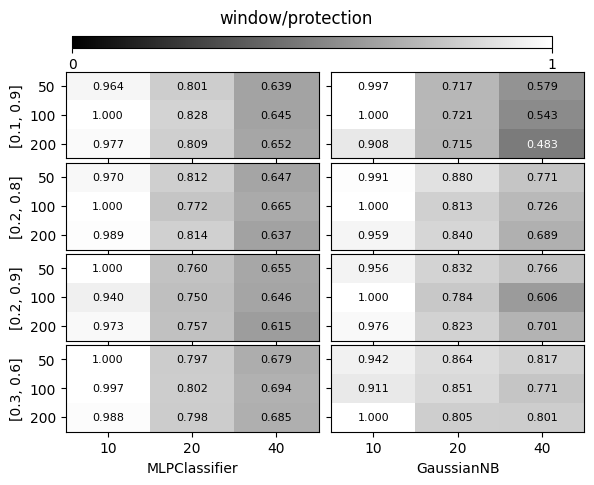

In [381]:
def draw_table_for_param_pair(df, param_1, param_2):
    stream_results = {}
    for stream in DDI_WEIGHTS:
        stream_data = df[df['stream'].str.startswith(stream)]
        prepared_data = split_name_to_params(stream_data).sort_values(by=['avg'], ascending=False)
        stream_results[stream] = prepared_data

    p_values_table = np.array([
        [
            calc_pval_table_for(stream_results[stream], base, param_1, param_2)
            for base in parameters['base']
        ] for stream in DDI_WEIGHTS
    ])
    scores = calc_scores(stream_results[DDI_WEIGHTS[0]], parameters['base'][0], param_1, param_2, .05)

    draw_big_table(p_values_table, parameters[param_1], parameters[param_2], parameters['base'], DDI_WEIGHTS,
                   title=f'{param_1}/{param_2}')

    return scores


draw_table_for_param_pair(all_data_noi, 'window', 'protection')